# Домашнее задание 1. Сбор данных

При решении реальных задач мы почти никогда не имеем дело с "хорошими" исходными данными, уже подготовленными для обработки и анализа. Как правило на входе имеются неструкткрированные данные в "грязном" виде, например необработанные тексты, изображения или аудио файлы. Иногда нет даже этого, и данные приходится собирать из разных доступных источников: разнообразных баз данных, внешних сервисов и даже электронных таблиц. После того, как данные получены, их унифицируют, очищают от шума, преобразовывают в нужный вид и сохраняют для дальнейшего анализа. В одном из традиционных подходов к Data Mining этот процесс называется Extract-Transform-Load

In [1]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 81kB 1.2MB/s ta 0:00:011
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
  Running setup.py bdist_wheel for vk ... done
  Stored in directory: /root/.cache/pip/wheels/4c/48/d1/09749ec47d9a30d166122773811f4ccb406f5234f2d84fd29d
  Running setup.py bdist_wheel for branca ... done
  Stored in directory: /root/.cache/pip/wheels/ee/84/4b/800814d126314dd2c3dd8e637f7dba4889527db60bb0428197
Successfully built folium vk branca
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import vk
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from folium.plugins import MarkerCluster
import datetime
import copy

%matplotlib inline

In [6]:
ACCESS_TOKEN = "89506e580db864bb5c54db91093f49f6c1eb38dc79c62b43d1230ea548e20c65d35f11b9667b2c8716172"
session = vk.Session(access_token=ACCESS_TOKEN)
vkapi = vk.API(session=session)

VK API может отдавать вам посещаемые места несколькими способами: в некотором радиусе от точки или же по id самого места. Мы будем пользоваться [вторым способом](https://vk.com/dev/places.getById) . Требуется написать функцию, которая на вход получает объект подключения к API и индекс, до какого объекта требуется запросить. Возвращать она будет pandas.DataFrame с полученными данными.

In [17]:
def get_place_info(vkapi, idx=15000):
    df = pd.DataFrame()
    lst = list()
    readed = 0
    while idx - readed:
        lst_tmp = vkapi.places.getById(places=((x for x in xrange(readed + 1, idx + 1))), v=5.0)
        df = df.append(pd.DataFrame.from_dict(lst_tmp))
        readed += len(lst_tmp)
    return df

In [18]:
df_places = get_place_info(vkapi)

In [19]:
df_places.head()

address  checkins   city  country     created  \
0     Мячковский б-р 3а       445    1.0        1  1280741941   
1             Дачная 2а        14  123.0        1  1280741941   
2      Лени Голикова 29         7    2.0        1  1280741941   
3  Героев Танкограда 63         9  158.0        1  1280741941   
4     Мусы Джалиля 14К1        44   99.0        1  1280741941   

                                     icon  id   latitude  longitude  \
0  https://vk.com/images/places/clubs.png   1  55.657941  37.751574   
1  https://vk.com/images/places/clubs.png   2  53.202017  50.141377   
2  https://vk.com/images/places/clubs.png   3  59.843376  30.231480   
3  https://vk.com/images/places/clubs.png   4  55.174954  61.451611   
4  https://vk.com/images/places/clubs.png   5  54.860834  83.091932   

         title  type       updated  
0  Baila Baila     4  1.529821e+09  
1         Lust     4  1.527326e+09  
2       Тайфун     4  1.522408e+09  
3    Hollywood     4  1.527298e+09  
4      Барабас     4  1.523693e+09

Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 15000.
Помогите нам это сделать.
А вот и сами факты:
1. Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?
2. Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?
3. Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.
4. Постройте box plot по числу чекинов для каждого типа объектов.
5. Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года? 

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

In [20]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945

In [21]:
data_moscow = df_places[df_places.latitude.between(mos_min_lat, mos_max_lat) &
                   df_places.longitude.between(mos_min_lon, mos_max_lon)]

In [22]:
moscow_1 = folium.Map(location=mos_center, zoom_start=11, control_scale=True)

In [23]:
marker_cluster_1 = MarkerCluster(locations=data_moscow[['latitude', 'longitude']].values)

In [24]:
marker_cluster_1.add_to(moscow_1)

In [25]:
folium.CircleMarker(mos_center, radius=130, color='blue', fill=True, fill_opacity=0.1).add_to(moscow_1)

In [26]:
moscow_1

1. Очевидно, что количество объектов в центре (к примеру, внутри синего круга (необходимо сохранить исходное маштабирование!)) как минимум не меньше чем вне этой области

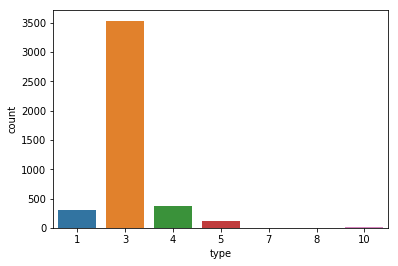

In [27]:
sns.countplot(data_moscow['type'])

Видно значительное преобладание объектов 3 типа

In [28]:
marker_cluster_2 = MarkerCluster()
moscow_2 = folium.Map(location=mos_center, zoom_start=11, control_scale=True)

In [29]:
marker_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
                  'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
                  'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
                  'gray', 'black', 'lightgray']

In [30]:
#раскоментируйте, чтобы получить распределение на карте

In [31]:
for i in range(0, 11):
    for iter in range(0, len(data_moscow[data_moscow['type'] == i][['latitude', 'longitude']].values)):
       folium.CircleMarker(location=data_moscow[data_moscow['type'] == i][['latitude', 'longitude']].values[iter], 
                           radius=1, color=marker_colors[i],
                           fill=True, fill_opacity=0.0001).add_to(moscow_2)

In [32]:
moscow_2

2. Из гистограммы сразу видно, что объектов 3 типа значительно больше, чем всех остальных типов  
Можно постоить распределение на карте (!аккуратно, построение карты может занять значительное время) (разные типы соответствуют разным цветам). На такой карте, можно заметить, что для всех типов объектов заметно преобладание в центральной области.

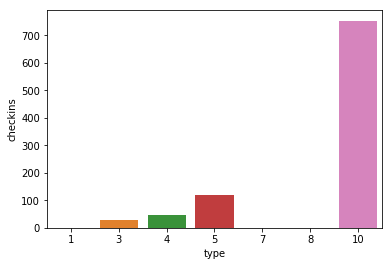

In [33]:
sns.barplot(x=data_moscow.groupby(['type'])['checkins'].aggregate('mean').index,
            y=data_moscow.groupby(['type'])['checkins'].aggregate('mean'))

Получаем, что в среднем, в объектах 10 типа чекинов проиходит на порядок больше, чем в других объектов

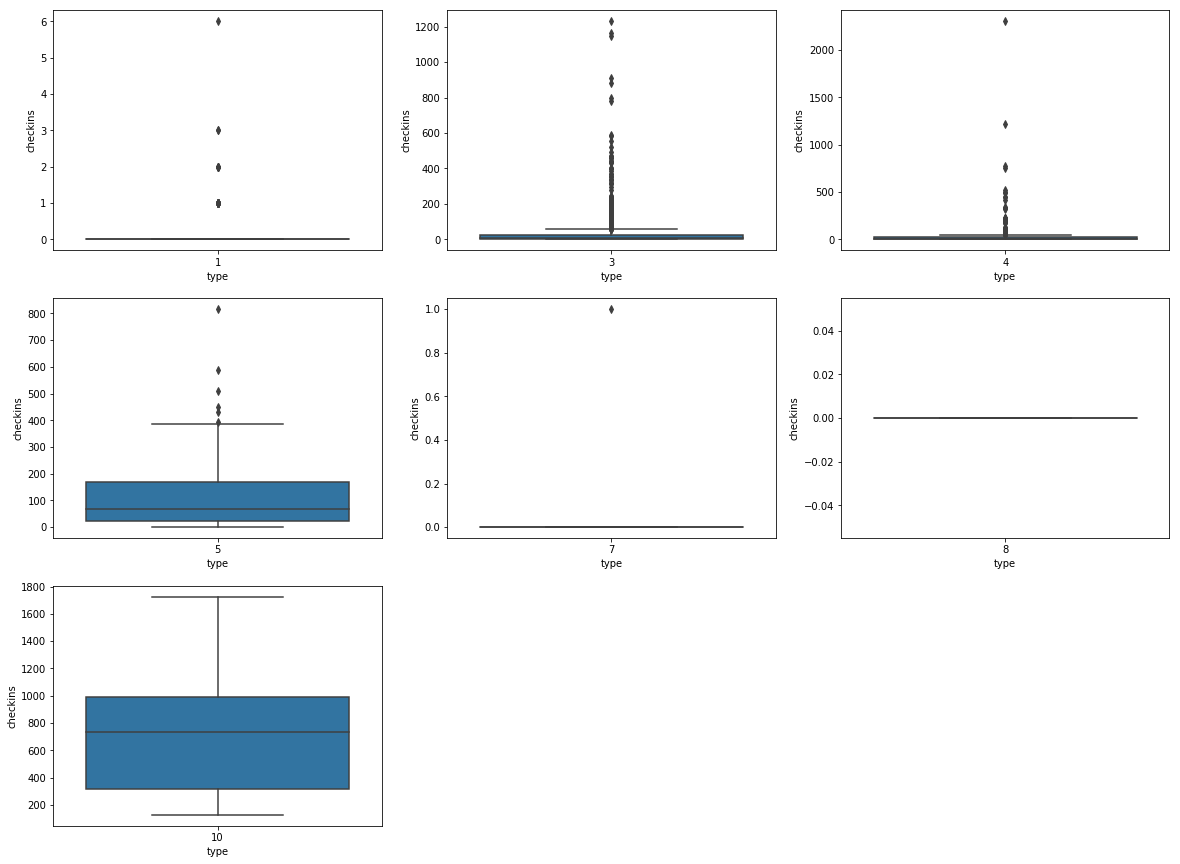

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for itr, ind in enumerate(data_moscow.groupby('type').type.indices.keys()):
    sns.boxplot(y=data_moscow.checkins[(data_moscow.type == ind)],
                x=data_moscow.type[(data_moscow.type == ind)],
                ax=axs[itr/3][itr%3])
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])

Данные на данных графиках значительно смещены к 0, т.к есть значительное количество объектов в которых не произошло ни одного чекина (к примеру, это хорошо заметно на объектах 1 типа), поэтому построим теже графики, но исключая объекты без чекинов

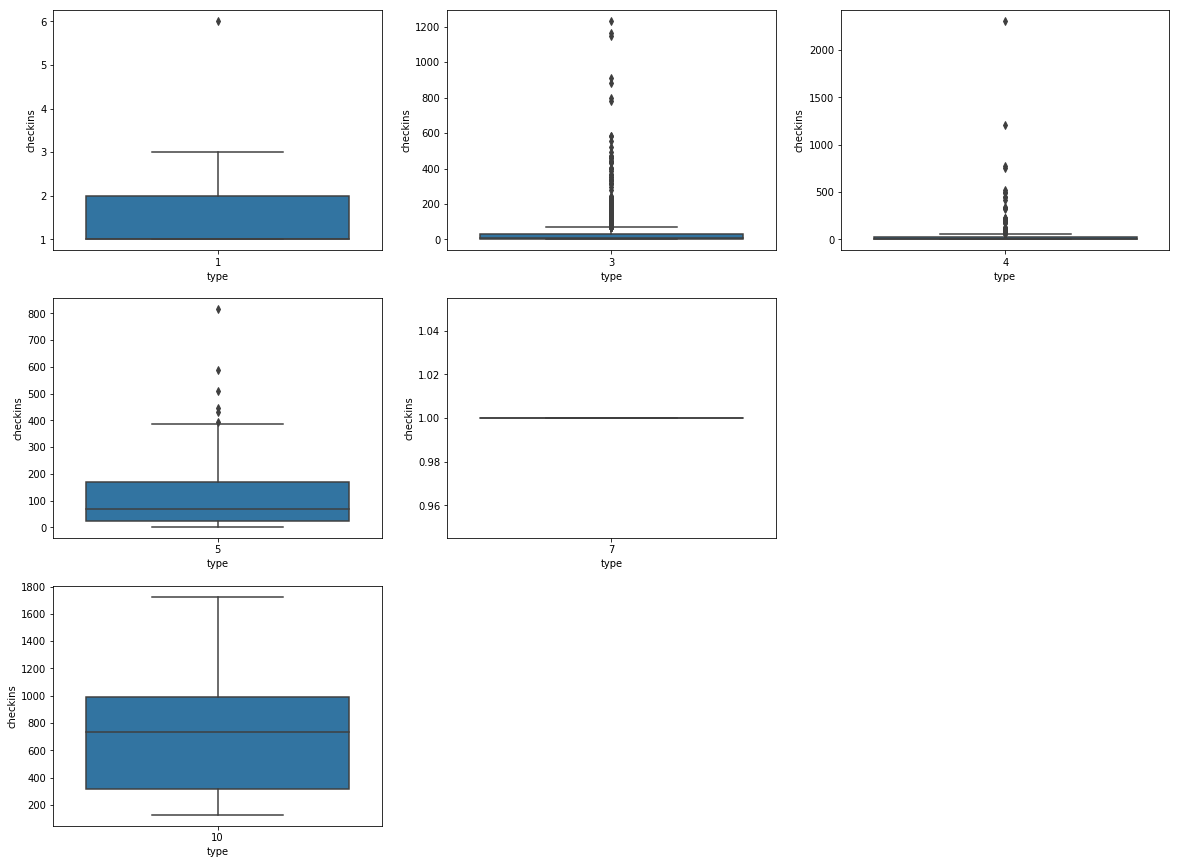

In [35]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for itr, ind in enumerate(data_moscow.groupby('type').type.indices.keys()):
    if(ind == 8):
        continue
    sns.boxplot(y=data_moscow.checkins[(data_moscow.type == ind)&(data_moscow.checkins != 0)],
                x=data_moscow.type[(data_moscow.type == ind)&(data_moscow.checkins != 0)],
                ax=axs[itr/3][itr%3])
fig.delaxes(axs[1][2])
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])

Из графиков можно сделать вывод, что чем больше элементов в классе, тем больше 'выбросов' из области между первым и третим квартилями. Это хорошо заметно на объектах 3 и 4 типа.

In [36]:
data_moscow_datest = copy.deepcopy(data_moscow)

In [37]:
data_moscow_datest.created = pd.to_datetime(data_moscow_datest.created, unit='s')

In [38]:
now_time = datetime.datetime.today()
cmp_time = now_time.replace(year=now_time.year - 1)
data_moscow_datest.loc[data_moscow_datest.created > cmp_time]
print 'Total elements - ', len(data_moscow_datest)
for i in range(0, 10):
    cmp_time = now_time.replace(year=now_time.year - i)
    print('Elements that older than ', i, ' years - ',
          len(data_moscow_datest.loc[data_moscow_datest.created > cmp_time]))
    

Total elements -  4338
('Elements that older than ', 0, ' years - ', 0)
('Elements that older than ', 1, ' years - ', 0)
('Elements that older than ', 2, ' years - ', 0)
('Elements that older than ', 3, ' years - ', 0)
('Elements that older than ', 4, ' years - ', 0)
('Elements that older than ', 5, ' years - ', 0)
('Elements that older than ', 6, ' years - ', 0)
('Elements that older than ', 7, ' years - ', 0)
('Elements that older than ', 8, ' years - ', 4338)
('Elements that older than ', 9, ' years - ', 4338)


Из простой таблицы выше видно, что все объекты созданы в промежутоке от 8 лет назад до 9 лет назад.

In [39]:
data_moscow.to_csv('moscow_loc.csv', encoding='utf-8')